### Recurrent Neural Network

Sunspot Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import statsmodels.api as sm

In [2]:
sunspots = pd.read_csv('monthly_sunspot.csv', sep = ';', index_col = 2)
sunspots

,year,month,number,standard_deviation,num_obs,provisional indicator
year_float,,,,,,
1749.042,1749,1,96.7,-1.0,-1,1
1749.123,1749,2,104.3,-1.0,-1,1
1749.204,1749,3,116.7,-1.0,-1,1
1749.288,1749,4,92.8,-1.0,-1,1
1749.371,1749,5,141.7,-1.0,-1,1
...,...,...,...,...,...,...
2023.538,2023,7,159.1,17.3,1039,0
2023.623,2023,8,114.8,15.4,1095,0
2023.705,2023,9,133.6,17.6,1140,0


Text(0.5, 1.0, 'sunspots data')

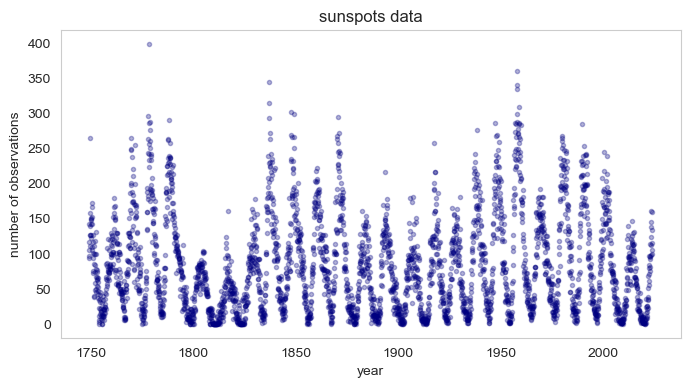

In [3]:
plt.figure(figsize = (8,4))
plt.scatter(
    sunspots.index, 
    sunspots['number'], 
    marker = '.', 
    alpha = 0.3,
    color = 'navy'
)
plt.grid(False)
plt.xlabel('year')
plt.ylabel('number of observations')
plt.title('sunspots data')

In [4]:
sps = sunspots['number']  
spz = (sps - min(sps))/(max(sps)-min(sps)) 

In [5]:
spz

year_float
1749.042    0.242843
1749.123    0.261929
1749.204    0.293069
1749.288    0.233049
1749.371    0.355851
              ...   
2023.538    0.399548
2023.623    0.288297
2023.705    0.335510
2023.790    0.249623
2023.873    0.264691
Name: number, Length: 3299, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    spz,
    shuffle = False,
    test_size = 0.2
)

In [7]:
back_time = 360

lstm_model = Sequential()
lstm_model.add(
    LSTM(
        40,
        activation = 'relu',
        return_sequences = True,
        input_shape = (360, 1),
    )
)

lstm_model.add(
    Dropout(0.05)
)

lstm_model.add(
    LSTM(
        10,
        activation = 'relu'
    )
)

lstm_model.add(
    Dense(24)
)

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 360, 40)           6720      
                                                                 
 dropout (Dropout)           (None, 360, 40)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                2040      
                                                                 
 dense (Dense)               (None, 24)                264       
                                                                 
Total params: 9,024
Trainable params: 9,024
Non-trainable params: 0
_________________________________________________________________


In [8]:
lstm_model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

lstm_model.fit(
    train, 
    train, 
    batch_size = 300, 
    epochs = 30,
    verbose = False
)

2023-12-14 10:49:03.356259: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


21/21 [==============================] - 0s 644us/step


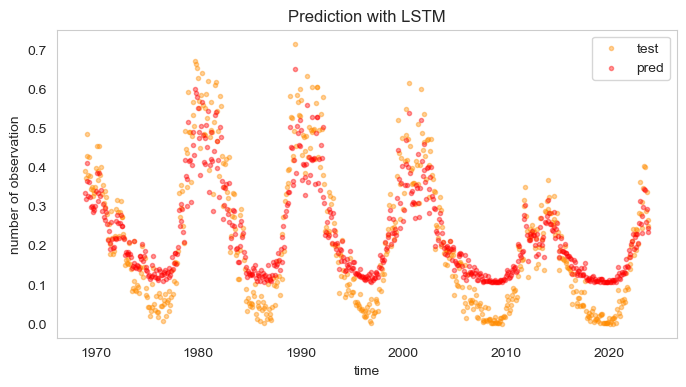

In [9]:
pred = lstm_model.predict(
    test,
    verbose = 1
)

plt.figure(figsize = (8, 4))
plt.scatter(
    test.index, 
    test, 
    color = 'darkorange', 
    alpha = 0.4,
    marker = '.',
    label = 'test'
)
plt.scatter(
    pd.Series(pred.mean(axis = 1), index = test.index).index,
    pd.Series(pred.mean(axis = 1), index = test.index),
    color = 'red',
    alpha = 0.4,
    marker = '.',
    label = 'pred'
)
plt.grid(False)
plt.legend()
plt.title('Prediction with LSTM')
plt.xlabel('time')
plt.ylabel('number of observation')
plt.show()

In [10]:
lstm_model.evaluate(
    test, 
    test, 
    verbose = 1
)

21/21 [==============================] - 0s 815us/step - loss: 0.0042


0.004160711541771889

#### Google Stock Price

In [43]:
import yfinance as yf

ticker_symbol = 'IBM'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(
    period = '1d', 
    start = '1962-1-1', 
    end = '2024-1-22'
)

In [44]:
ticker_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-05:00,1.573446,1.573446,1.555766,1.555766,407940,0.0,0.0
1962-01-03 00:00:00-05:00,1.555765,1.569364,1.555765,1.569364,305955,0.0,0.0
1962-01-04 00:00:00-05:00,1.569366,1.569366,1.553047,1.553727,274575,0.0,0.0
1962-01-05 00:00:00-05:00,1.551687,1.551687,1.520408,1.523128,384405,0.0,0.0
1962-01-08 00:00:00-05:00,1.521768,1.521768,1.482330,1.494569,572685,0.0,0.0


In [45]:
temp = ticker_df[['Open','High','Low','Close','Volume']]
feature_matrix = (temp - temp.min()) / (temp.max() - temp.min())

In [36]:
back = 60

feature = feature_matrix[["Volume", "Open","High","Low"]]
target = feature_matrix[["Close","Open"]]

X = []
y = []

for i in range(back, len(target)) : 
    y.append(target[i:(i+1)])
    X.append(feature[(i-back):i])

X, y = np.array(X), np.array(y).squeeze()   # .reshape(-1)
test_size = 1000

y_train, y_test  = y[:-test_size], y[-test_size:]
X_train, X_test =  X[:-test_size], X[-test_size:]

In [37]:
lstm_model_stock = Sequential()
lstm_model_stock.add(
    LSTM(
        units = 40,
        return_sequences = True,
        input_shape = (X_train.shape[1], 4)
    )
)
lstm_model_stock.add(
    Dropout(0.05)
)
lstm_model_stock.add(
    LSTM(
        units = 20,
        return_sequences = True
    )
)
lstm_model_stock.add(
    LSTM(units = 8)
)
lstm_model_stock.add(
    Dense(units = 2)
)
lstm_model_stock.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 40)            7200      
                                                                 
 dropout_3 (Dropout)         (None, 30, 40)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 20)            4880      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 928       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 13,026
Trainable params: 13,026
Non-trainable params: 0
_________________________________________________________________


In [38]:
lstm_model_stock.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)
fitted = lstm_model_stock.fit(
    X_train, 
    y_train, 
    epochs = 10, 
    batch_size = 128
)

Epoch 1/10
114/114 [==============================] - 4s 22ms/step - loss: 0.0108
Epoch 2/10
114/114 [==============================] - 3s 23ms/step - loss: 1.8644e-04
Epoch 3/10
114/114 [==============================] - 3s 23ms/step - loss: 1.7274e-04
Epoch 4/10
114/114 [==============================] - 3s 23ms/step - loss: 1.5651e-04
Epoch 5/10
114/114 [==============================] - 3s 24ms/step - loss: 1.4987e-04
Epoch 6/10
114/114 [==============================] - 3s 23ms/step - loss: 1.4120e-04
Epoch 7/10
114/114 [==============================] - 3s 23ms/step - loss: 1.3762e-04
Epoch 8/10
114/114 [==============================] - 3s 23ms/step - loss: 1.3150e-04
Epoch 9/10
114/114 [==============================] - 3s 23ms/step - loss: 1.3473e-04
Epoch 10/10
114/114 [==============================] - 3s 23ms/step - loss: 1.2854e-04


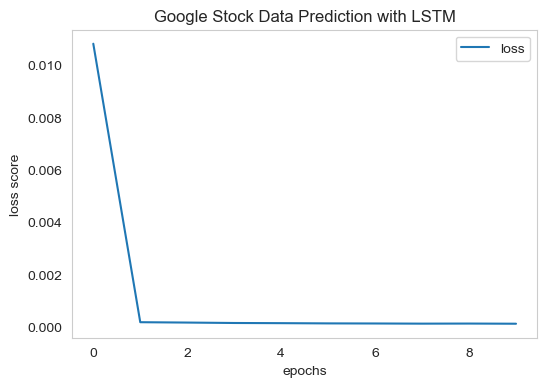

In [39]:
plt.figure(figsize = (6, 4))
plt.plot(fitted.history['loss'])
plt.legend(['loss'])
plt.xlabel('epochs')
plt.ylabel('loss score')
plt.title('Google Stock Data Prediction with LSTM')
plt.grid(False)
plt.show()

In [40]:
loss = lstm_model_stock.evaluate(X_test, y_test, verbose = 1)
print(loss)

32/32 [==============================] - 1s 3ms/step - loss: 9.0454e-04
0.000904540007468313


In [41]:
pred = lstm_model_stock.predict(X_test, verbose = 1)

32/32 [==============================] - 0s 3ms/step


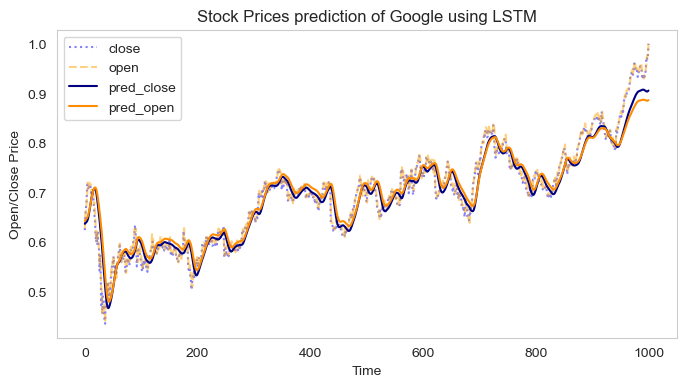

In [42]:
plt.figure(figsize = (8, 4))
plt.plot(y_test[:,0], label = "close", color = 'blue', alpha = 0.5, ls = ':')
plt.plot(y_test[:,1], label = "open", color = 'orange', alpha = 0.5, ls = '--')
plt.plot(pred[:,0], color = 'navy', label = 'pred_close')
plt.plot(pred[:,1], color = 'darkorange', label = 'pred_open')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Open/Close Price")
plt.title("Stock Prices prediction of Google using LSTM")
plt.grid(False)
plt.show()

In [46]:
pred

array([[0.6371869 , 0.6433513 ],
       [0.6387792 , 0.6449616 ],
       [0.63943744, 0.6462679 ],
       ...,
       [0.9037247 , 0.88516253],
       [0.9044583 , 0.8855605 ],
       [0.90563107, 0.8862463 ]], dtype=float32)

차분 데이터를 사용하면 어떨까?

In [38]:
import yfinance as yf

ticker_symbol = 'GOOGL'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(
    period = '1d', 
    start = '2010-1-1', 
    end = '2023-12-8'
)

feature_matrix = ticker_df[['Open','High','Low','Close','Volume']]

In [39]:
back = 60

feature = feature_matrix.pct_change(1).dropna()[["Volume", "Open","High","Low"]]
target = feature_matrix.pct_change(1).dropna()[["Close","Open"]]

X = []
y = []

for i in range(back, len(target)) : 
    y.append(target[i:(i+1)])
    X.append(feature[(i-back):i])

X, y = np.array(X), np.array(y).squeeze()   # .reshape(-1)
test_size = 251

y_train, y_test  = y[:-test_size], y[-test_size:]
X_train, X_test =  X[:-test_size], X[-test_size:]

In [55]:
lstm_model_stock = Sequential()
lstm_model_stock.add(
    LSTM(
        units = 40,
        return_sequences = True,
        input_shape = (X_train.shape[1], 4)
    )
)
lstm_model_stock.add(
    Dropout(0.05)
)
lstm_model_stock.add(
    LSTM(
        units = 20,
        return_sequences = True
    )
)
lstm_model_stock.add(
    LSTM(units = 8)
)
lstm_model_stock.add(
    Dense(units = 2)
)
lstm_model_stock.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 60, 40)            7200      
                                                                 
 dropout_6 (Dropout)         (None, 60, 40)            0         
                                                                 
 lstm_26 (LSTM)              (None, 60, 20)            4880      
                                                                 
 lstm_27 (LSTM)              (None, 8)                 928       
                                                                 
 dense_10 (Dense)            (None, 2)                 18        
                                                                 
Total params: 13,026
Trainable params: 13,026
Non-trainable params: 0
_________________________________________________________________


In [56]:
lstm_model_stock.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)
fitted = lstm_model_stock.fit(
    X_train, 
    y_train, 
    epochs = 1, 
    batch_size = 64
)

50/50 [==============================] - 3s 28ms/step - loss: 3.0883e-04


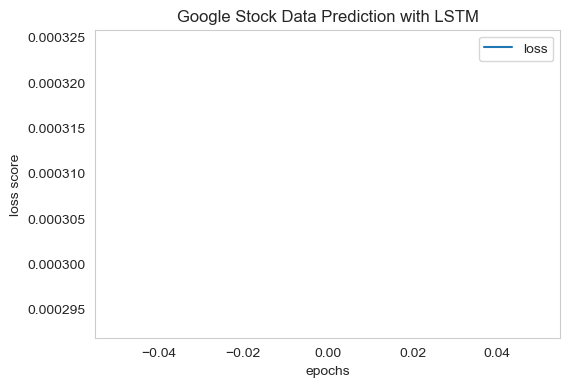

In [57]:
plt.figure(figsize = (6, 4))
plt.plot(fitted.history['loss'])
plt.legend(['loss'])
plt.xlabel('epochs')
plt.ylabel('loss score')
plt.title('Google Stock Data Prediction with LSTM')
plt.grid(False)
plt.show()

In [58]:
loss = lstm_model_stock.evaluate(X_test, y_test, verbose = 1)
print(loss)

8/8 [==============================] - 0s 7ms/step - loss: 3.6643e-04
0.0003664293617475778


In [59]:
pred = lstm_model_stock.predict(X_test, verbose = 1)

8/8 [==============================] - 0s 5ms/step


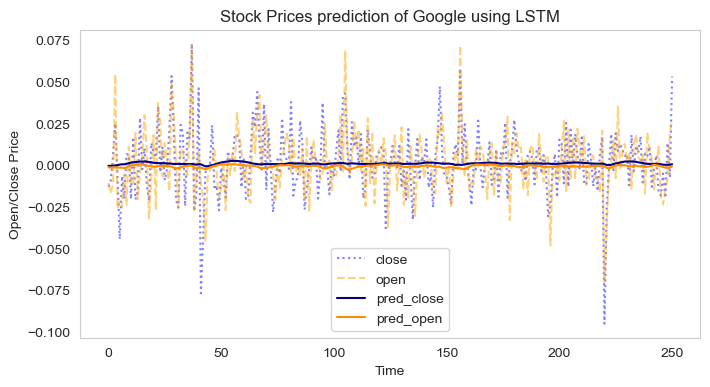

In [60]:
plt.figure(figsize = (8, 4))
plt.plot(y_test[:,0], label = "close", color = 'blue', alpha = 0.5, ls = ':')
plt.plot(y_test[:,1], label = "open", color = 'orange', alpha = 0.5, ls = '--')
plt.plot(pred[:,0], color = 'navy', label = 'pred_close')
plt.plot(pred[:,1], color = 'darkorange', label = 'pred_open')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Open/Close Price")
plt.title("Stock Prices prediction of Google using LSTM")
plt.grid(False)
plt.show()